In [1]:
%load_ext autoreload
%autoreload 2

# ODENet applied to MNIST dataset

## Imports

In [2]:
import numpy as np


## Load Data

In [3]:
from src.data.load_data import get_mnist
from torch.utils.data import DataLoader

train_set, test_set = get_mnist()
train = DataLoader(train_set, 32, shuffle=True, num_workers=6)
test = DataLoader(test_set, num_workers=6)

In [4]:
import matplotlib.pyplot as plt

def plot_image(image, predictions_array, true_label):
    plt.grid(False)
    plt.xticks([]); plt.yticks([])
    
    plt.imshow(image, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)
    plt.show()
    
    
def plot_value_array(predictions_array, true_label):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  

## Model

### Construct Model

In [5]:
from src.odenet.odenet import EulerNet
print('Initializing network')
net = EulerNet((1, 28, 28), 5, reduce_to=10)

Initializing network


### Make an untrained prediction

[1.8784078e-30 1.8459873e-30 1.6723590e-25 1.7301914e-17 5.5186498e-31
 9.4062817e-32 5.8711603e-41 1.0000000e+00 2.1380198e-30 2.4931329e-22]
torch.Size([1, 1, 28, 28])


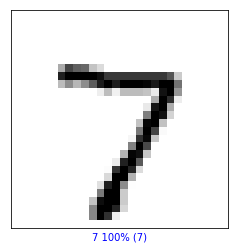

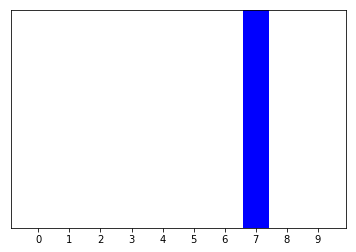

In [27]:
import torch
image, label = next(iter(test))
with torch.no_grad():
    prediction = np.exp(net.forward(image[0].to('cuda:0')).cpu().numpy())[0]
    print(prediction)
    print(image.shape)
    
    plot_image(image[0][0], prediction, label[0])
    plot_value_array(prediction, label[0])
    plt.show()

### Train model

Training network
Using device 'cuda:0' for training
Finished training


100%|██████████| 2/2 [00:39<00:00, 19.92s/it]


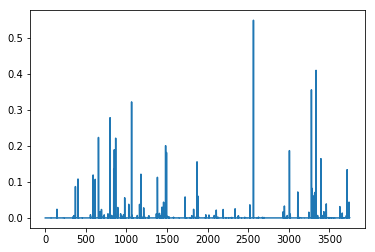

In [28]:
print('Training network')
training_results = net.train_network(train, epochs = 2)
print('Finished training')

plt.plot(np.arange(len(training_results)), training_results)
plt.show()

### Plot results

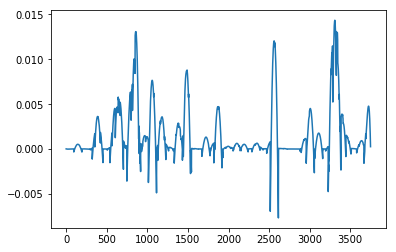

In [29]:
from scipy.signal import savgol_filter
plt.plot(savgol_filter(training_results, 101, 3))
plt.show()

### Make predictions

In [30]:
print('Accuracy: ', net.evaluate(test))

Accuracy:  0.983
